# Modelo DBSCAN  

In [24]:
#Imports
import numpy as np 
import collections
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from scipy.stats import variation
from scipy.cluster.hierarchy import cophenet

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

## Carga de datos preprocesados 

In [25]:
# Carga datos preprocesados

nhanesDF = pd.read_csv('/Users/raul/Documents/UOC/TFM/NHANEScluster/Data/Processed/nhanesDF.csv',
                           sep=',', index_col=[0])
nhanesDF.shape

(2350, 32)

In [28]:
# Data selection

X = nhanesDF.loc[:, 'BMXBMI':'RIDRETH3_7']
X = StandardScaler().fit_transform(X)

## Modelo DBSCAN

Estimated number of clusters: 2
Estimated number of noise points: 3
Silhouette Coefficient: 0.254


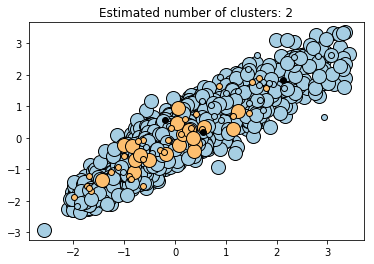

Counter({0: 2299, 1: 48, -1: 3})

In [29]:
# DBSCAN Parametrización

dbscan = DBSCAN(eps=7, min_samples=30)
model = dbscan.fit(X)

core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
labels = model.labels_

# Number of clusters in labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))

# DBSCAN, outliers identified in black
unique_labels = set(labels)
colors = [plt.cm.Paired(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

collections.Counter(labels)

In [21]:
clust1 = nhanesCleanDF.iloc[np.where(labels == 1)]
pd.set_option('display.max_columns', None)
clust1.describe()

,SEQN,BMXBMI,BMXWAIST,BPXDI1,DIQ010,LBXGLU,LBXIN,HIQ011,HOD050,HOQ065,HSD010,INQ020,MCQ010,MCQ300C,PAQ650,PAQ665,PAQ710,PAQ715,RHQ160,SLD012,SMQ040,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2
count,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,78582.416667,27.535417,97.702083,70.500000,2.00000,103.250000,9.379375,1.354167,5.291667,3.0,3.312500,1.500000,1.791667,1.562500,1.916667,1.645833,2.875000,1.072917,1.187500,6.958333,2.104167,1.395833,52.437500,3.000000,3.062500
std,8486.655705,5.696789,14.143001,11.158434,0.29173,12.020373,6.221289,0.483321,2.020726,0.0,0.854432,0.505291,0.410414,0.501328,0.279310,0.483321,1.739711,1.512324,1.709252,1.758969,0.972813,0.494204,17.536474,0.945313,1.192285
min,62402.000000,16.900000,72.000000,48.000000,1.00000,83.000000,1.130000,1.000000,1.000000,3.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000,21.000000,1.000000,1.000000
25%,73349.500000,23.575000,88.975000,64.000000,2.00000,95.750000,4.885000,1.000000,4.000000,3.0,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,6.000000,1.000000,1.000000,36.500000,3.000000,2.000000
50%,79205.500000,27.700000,97.200000,70.000000,2.00000,102.500000,7.850000,1.000000,5.500000,3.0,3.000000,1.500000,2.000000,2.000000,2.000000,2.000000,3.000000,0.500000,0.000000,7.000000,3.000000,1.000000,53.000000,3.000000,3.000000
75%,83947.250000,30.850000,105.350000,78.000000,2.00000,109.000000,11.727500,2.000000,6.000000,3.0,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,1.250000,2.250000,8.000000,3.000000,2.000000,67.250000,3.250000,4.000000
max,93241.000000,39.200000,129.100000,94.000000,3.00000,143.000000,32.120000,2.000000,9.000000,3.0,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,5.000000,6.000000,10.000000,3.000000,2.000000,80.000000,6.000000,5.000000


In [22]:
clust1['HOQ065'].value_counts()

3.0    48
Name: HOQ065, dtype: int64

In [23]:
clust0 = nhanesCleanDF.iloc[np.where(labels == 0)]
pd.set_option('display.max_columns', None)
clust0.describe()


,SEQN,BMXBMI,BMXWAIST,BPXDI1,DIQ010,LBXGLU,LBXIN,HIQ011,HOD050,HOQ065,HSD010,INQ020,MCQ010,MCQ300C,PAQ650,PAQ665,PAQ710,PAQ715,RHQ160,SLD012,SMQ040,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2
count,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.00000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,78422.757286,28.637843,100.343671,69.783384,1.898652,106.921705,12.394211,1.22401,5.680541,1.398434,2.930839,1.282297,1.832101,1.571988,1.810787,1.593736,2.708569,1.146368,1.227055,7.084855,2.190953,1.351457,52.276207,3.231405,3.314050
std,9140.905593,5.908819,15.130787,11.733777,0.379745,22.565521,10.174862,0.41702,1.985953,0.489682,0.939419,0.450215,0.373858,0.494898,0.391763,0.491242,1.567351,1.403480,2.045551,1.559944,0.935977,0.477529,16.685146,1.370600,1.190559
min,62172.000000,13.400000,56.200000,32.000000,1.000000,21.000000,0.140000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,20.000000,1.000000,1.000000
25%,69901.500000,24.400000,90.050000,62.000000,2.000000,94.000000,6.000000,1.00000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,6.000000,1.000000,1.000000,38.000000,3.000000,2.000000
50%,79000.000000,27.800000,99.400000,70.000000,2.000000,102.000000,9.420000,1.00000,5.824634,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.500000,0.000000,7.000000,3.000000,1.000000,53.000000,3.000000,3.000000
75%,86180.500000,31.900000,109.300000,78.000000,2.000000,112.000000,15.340000,1.00000,7.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,8.000000,3.000000,2.000000,65.000000,4.000000,4.000000
max,93695.000000,48.800000,151.000000,108.000000,3.000000,222.000000,83.340000,2.00000,13.000000,2.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,5.000000,12.000000,14.500000,3.000000,2.000000,80.000000,7.000000,5.000000


## Evaluación

In [16]:
# Aplicación métrica davies_bouldin

davies_bouldin_score(X, labels)

1.7946948264794134